## 2주차 미션 소개 - EDA를 통한 머신러닝에 영향을 미치는 주요 변수 확인하기

* EDA 를 통해 어떤 피처가 이탈에 영향을 미치는지 확인하고 피처를 변경해서 모델의 성능 개선해 보기
* EDA는 데이터의 구조, 패턴, 이상치, 변수 간 관계 등을 파악하는 데 도움을 줍니다. 모델링 전 데이터에 대한 이해를 가능하게 합니다. 고객 이탈에 영향을 미치는 중요 변수를 식별함으로써, 더 효과적인 피처 선택을 할 수 있습니다. 불필요하거나 적절하지 않은 피처를 제거함으로써, 모델이 특정 데이터에 과적합되는 것을 방지할 수 있습니다. EDA과정은 모델의 복잡성을 줄이고, 성능을 개선하기 위한 피처엔지니어링 전략을 세우는데 중요합니다.

* 미션 데이터셋 소개
    * 해당 Kaggle 데이터셋( https://www.kaggle.com/blastchar/telco-customer-churn )은 통신사 고객 이탈(Churn)에 대한 정보를 담고 있습니다. IBM에서 제공한 이 데이터셋은 고객 유지에 필요한 행동을 예측하는 데 사용될 수 있으며, 고객 데이터를 분석하여 고객 유지 프로그램을 개발하는 데 도움이 됩니다.
    * 해당 데이터셋은 다음의 정보로 구성되어 있습니다.
        * 고객 인구 통계 정보(Demographic info): 고객의 성별, 연령대, 배우자 및 부양 가족의 유무(Gender, SeniorCitizen, Partner, Dependents) 등에 관한 정보가 포함되어 있습니다.
        * 고객 이탈(Churn) 정보: 서비스를 중단 여부에 대한 정보가 포함되어 있습니다.
        * 서비스 가입 정보(Services subscribed): 고객들이 가입한 서비스들, 예를 들어 전화, 다중 라인, 인터넷, 온라인 보안, 온라인 백업, 장치 보호, 기술 지원, 스트리밍 TV 및 영화( honeService, MultipleLine, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies) 등에 대한 정보가 있습니다.
        * 고객 계정 정보(Customer account info): 고객이 얼마나 오래 서비스를 이용했는지, 계약 유형, 결제 방법, 무페이퍼 청구 여부, 월별 요금, 총 요금 (CustomerID, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Tenure)등의 정보가 담겨 있습니다.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# 미션 수행을 위해 데이터셋을 로드합니다.
df = pd.read_csv("https://bit.ly/telco-csv", index_col="customerID")
df.shape

(7043, 20)

In [4]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# TotalCharges 가 수치 타입이 아니기 때문에 수치 연산을 위해 숫자 형태로 변경합니다.
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

## 미션 1 -  전체 수치 변수를 정답인 이탈 여부로 시각화하고 분석하기
데이터셋의 모든 수치형 변수를 이탈 여부에 따라 시각화하고 수치 구간에 따라 이탈률의 차이에 대해 분석해 주세요.
아래 이미지는 참고용으로 아래 이미지와 똑같이 시각화하지 않아도 됩니다. 이탈 여부를 잘 분석할 수 있는 시각화라면 어떤 시각화든 좋습니다.

<img src="https://i.imgur.com/oCQ9D0l.png">

In [6]:
# 위 예시처럼 수치 변수에 대한 히스토그램을 정답값으로 색상을 다르게 하여 히스토그램으로 시각화 해주세요.
# 먼저 데이터 탐색부터
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [7]:
# null값부터 확인, TotalCharges만 null 존재
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
# 특별히 None을 0으로 처리한 부분은 없는 것으로 보인다.
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<Axes: xlabel='SeniorCitizen', ylabel='count'>

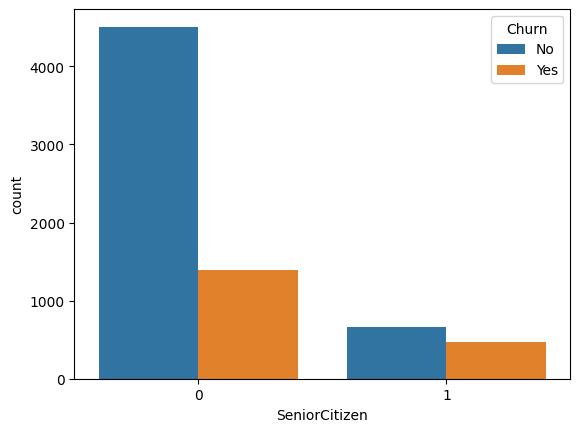

In [41]:
# SeniorCitizen 여부를 분류하고 이를 기준으로 hue에 Churn 적용
# SeniorCitizen이 아닌 사람들보다 더 적고, 이탈횟수도 적지만, 이탈률은 훨씬 더 높다.
sns.countplot(data=df, x="SeniorCitizen", hue="Churn")

<Axes: xlabel='tenure', ylabel='count'>

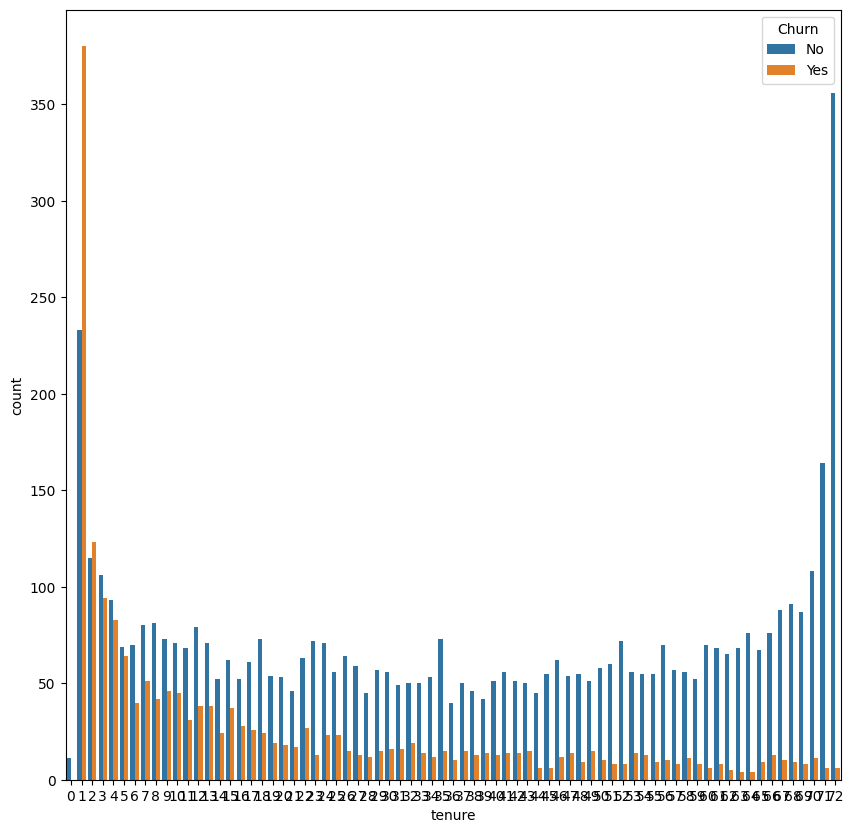

In [30]:
# 위의 4가지 수치 데이터와 Churn과의 관계를 히스토그램으로 만들기
# sc_churn_df=df.groupby('SeniorCitizen')['Churn'].count()

# 아래는 tenure histogram으로 Churn여부를 표현
# 어찌보면 당연한 말이지만, 오랫동안 서비스를 사용할수록 이탈률이 낮음
plt.figure(figsize=(10, 10))
sns.countplot(data=df, x='tenure', hue="Churn")

<Axes: xlabel='MonthlyCharges', ylabel='count'>

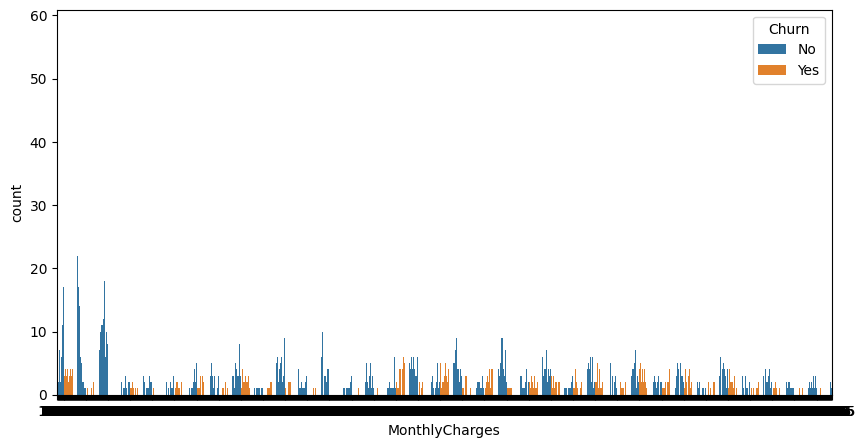

In [43]:
# MonthlyCharges 분석, 매끄럽게 나오지 않아 한눈에 들어오지 않는다.
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="MonthlyCharges", hue="Churn")

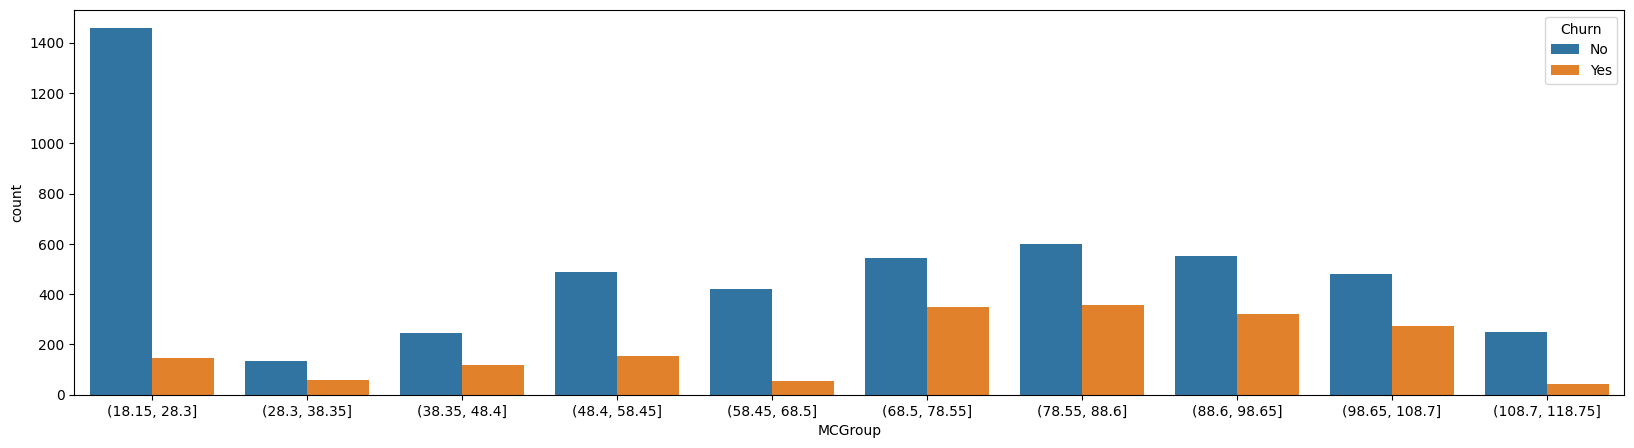

In [40]:
# MonthlyCharges를 10분위로 나눈 다음 Churn여부를 그래프로 확인
# 대체로 MonthlyCharges가 높을수록 이탈률이 높다고 볼 수 있을 것 같다.
# 고가상품에 대한 고객 만족도가 떨어진다고 해석할 수 있을 것 같다.
plt.figure(figsize=(20, 5))
df["MCGroup"]=pd.cut(df['MonthlyCharges'], bins=10)
sns.countplot(data=df, x='MCGroup', hue="Churn")
# plt.xticks(ha='right')
plt.show()

<Axes: xlabel='TotalCharges', ylabel='count'>

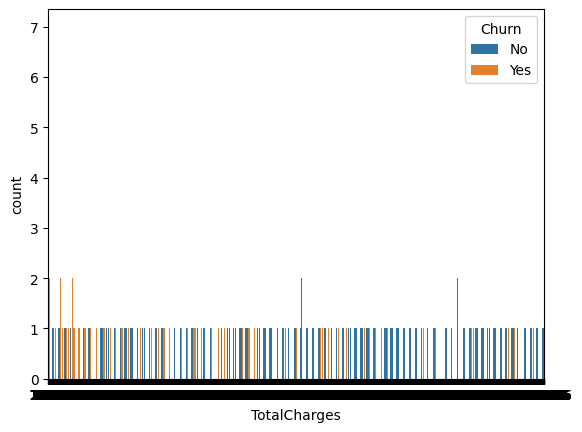

In [44]:
# TotalCharges
sns.countplot(data=df, x='TotalCharges', hue='Churn')

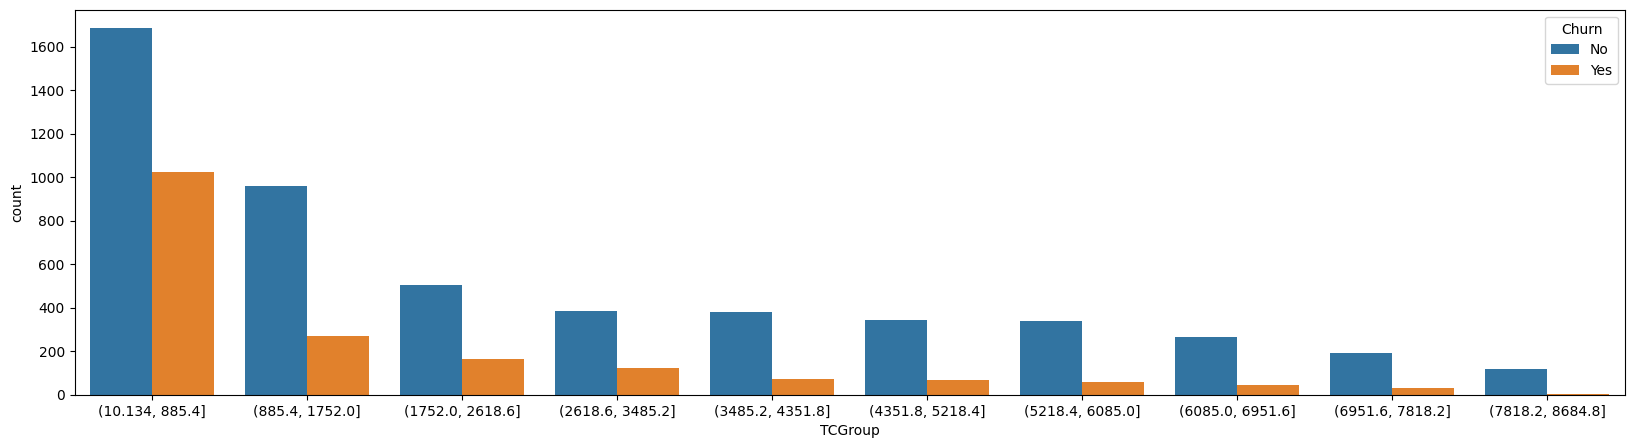

In [48]:
# 10 분위로 나누어서 본 TotalCharges와 Churn의 관계, 금액을 많이 사용할수록 Churn이 적다.
# '오래 사용했으니까 그런거 아냐?'라고 할 수 있을지도 모르지만,
# 어쩌면 고가의 상품을 사용하는 사람일수록 잘 이탈하지 않는다는 뜻으로 해석할 수는 없을까?

plt.figure(figsize=(20, 5))
df["TCGroup"]=pd.cut(df['TotalCharges'], bins=10)
sns.countplot(data=df, x='TCGroup', hue='Churn')
plt.show()

In [50]:
# 위의 MonthlyCharge에서 봤을 때는 고가 상품을 사용할 경우 의외로 이탈률이 높아보였다.
# 그렇다면 TotalCharge가 높을수록 이탈률이 낮은 이유는 오랜 시간 사용했기 때문이라 할 수 있을까?
# 우선 MonthlyCharge의 의미를 명확히 할 필요가 있을 것 같다.
# 내가 생각한 MonthlyCharge의 의미는 TotalCharge/tenure라고 생각하고 있는데, 이것부터 맞는지 확인해 봐야겠다.
df["AvgCharge"]=df["TotalCharges"].div(df['tenure']).round(2)

In [52]:
# 확인 결과, mean()값은 매우 작았고, MonthlyCharge는 TotalCharge/tenure로 보는 것이 맞는 것 같다.
(df['MonthlyCharges']-df['AvgCharge']).mean()

-0.0011817406143344491

## 미션 2 - 주요 범주형 변수와 정답 값 비교하기

* 범주형 변수가 타겟 변수에 어떤 영향을 미치는지 이해함으로써, 해당 변수의 중요성을 파악할 수 있습니다. 이는 피처 선택 과정에서 중요한 지표가 됩니다. 범주형 변수와 정답 값 간의 관계를 분석함으로써 비즈니스 의사결정, 데이터 전략 수립, 모델 설계에 활용할 수 있습니다. 범주형 변수가 타겟 변수와 강한 관계를 보일 경우, 이는 모델의 예측 성능을 향상시킬 수 있는 중요한 피처임을 알아볼 수 있습니다. 범주형 변수와 정답 값 간의 비교를 통해 예상치 못한 패턴이나 이상치를 발견할 수 있습니다. 이는 데이터 전처리 과정에서 문제점을 해결하고 데이터의 품질을 개선하는 데 도움이 됩니다.
* 주요 범주형 변수와 타겟값인 이탈여부를 분석하는 시각화를 진행하고 그 과정에서 알게된 점을 정리해 주세요.

<img src="https://i.imgur.com/Q1KpQpP.png" width="500">

In [54]:
# feature 값 종류가 5개 미만이면 category 데이터로 본다.
# list를 index로 사용하기 위한 초석인 듯
nunique = df.nunique()
category_col = nunique[nunique < 5]
category_col

gender              2
SeniorCitizen       2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
dtype: int64

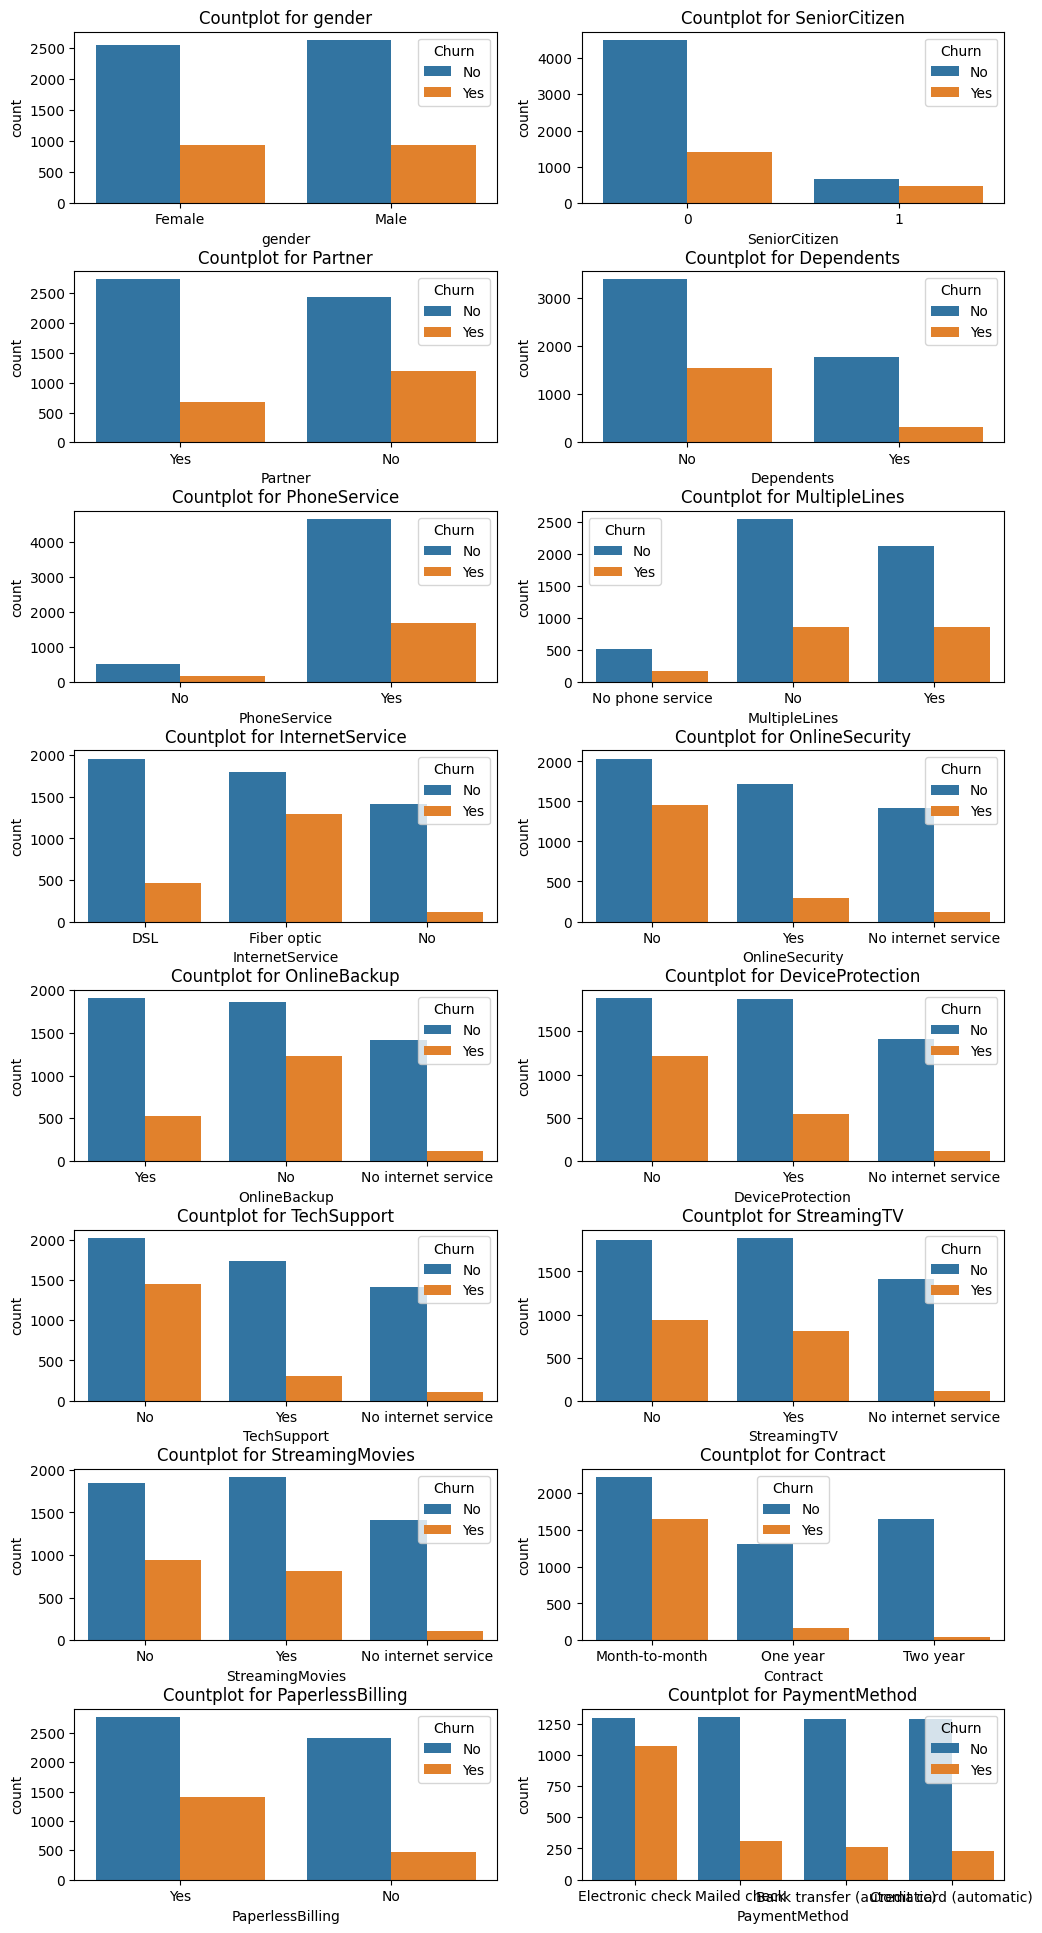

In [63]:
# 다음의 코드를 실행하면 범주형 변수를 볼 수 있습니다.
# 위 예시처럼 시각화를 여기에 구현해 주세요.

category_col_name = category_col.index.tolist()
category_col_name= category_col_name[:-1]

# 각 category_col_name에 대하여 countplot을 만든다.(Churn제외)
# 한번에 여러 개의 subplot을 만들기 위해 row와 column을 구한다. -1은 Churn 제외
tot_col= 2
tot_row= (len(category_col_name))// tot_col

fig, axes= plt.subplots(tot_row, tot_col, figsize=(12, 3* tot_row))

for i, col in enumerate(category_col_name):
  row_idx= i// tot_col
  col_idx= i% tot_col
  sns.countplot(data=df, x=col, hue='Churn', ax=axes[row_idx, col_idx])
  axes[row_idx, col_idx].set_title(f"Countplot for {col}")

plt.subplots_adjust(hspace=0.4)
plt.show()



- categorical data에 대한 분석에서 아래의 데이터들은 churn을 발생시키는 결정적인 요인이라고 보기 어렵다 판단하였다.  

 - 성별(gender), 고령자(SeniorCitizen), 반려자(Partner), 부양가족(Dependents), 전화 서비스(PhoneService), 다중회선 서비스(MultipleLines)  

- 인적사항인 성별, 고령자, 반려자, 부양가족 여부 등은 인적 사항으로, 추가적인 정보 없이 판단하기 어려우며, 이러한 성향이 간접적으로 이탈률에 영향을 미칠 수는 있지만, **직접적인 요인**으로 보기는 어렵기 때문이다.  

- **직접적인 요인**은 **가격 대비 성능 및 서비스 불만에 대해서만 존재한다고 가정**한다.
서비스가 어떻든, 가장 근본적인 불만은 '지불한 만큼 받지 못한다'에 있기 때문이라고 생각하기 때문이다. 그렇기 때문에 아래의 항목들을 집중하여 볼 필요가 있다고 생각한다.  
 - 인터넷 서비스(InternetService), 온라인 보안(OnlineSecurity), 온라인 백업(OnlineBackup), 디바이스 보호(DeviceProtection),
기술지원(TechSupport), 스트리밍TV(StreamingTV), 스트리밍영화(StreamingMovie), 계약 방식(Contract), 전자청구서(PaperlessBilling), 결재 방식(PaymentMethod)

- 인터넷 서비스에서는 fiber optic이 DSL보다 이탈률이 훨씬 더 높은 것으로 보인다. 2.5배에서 3배 정도 차이나는 것으로 보이며, 이는 fiber optic(광섬유)를 사용한 인터넷 서비스에 문제가 있을 수 있음을 시사한다.

- 온라인 보안, 온라인 백업, 디바이스 보호는 묶어 생각할 수 있겠다. 보안에 취약한 경우 각종 악성 코드에 시달릴 수 있기 때문에(그리고 누군가의 탓을 해야 되기 때문에...) 서비스 만족도는 당연히 낮아지게 된다.   

- 기술지원의 경우도 꽤 의미있는 수치를 보여주고 있는데, 기술지원을 받지 않은 그룹에 비해 기술지원을 받은 그룹이 현저히 이탈률이 낮은 것을 알 수 있다. 이는 기술지원의 만족도는 높지만, 사용자들이 기술지원을 받을 생각을 하지 못하거나, 기술 지원의 문턱이 높기 때문에 신청하지 못하고 서비스 종료로 이어진다는 분석을 할 수 있다.  

- 계약 방식에서는 month-to-month의 이탈률이 one-year contract에 비해 월등히 높은 것을 알 수 있는데, 이는 소위 '찍먹' 유저들이 정착하지 못하고 나간다는 것을 의미한다. 정상적인 경우 one-year contract에 훨씬 더 많은 혜택을 부여하는데 그럼에도 불구하고 month-to-month를 선택하는 것은 한 곳에 오래 머물지 않거나 한번 사용해보고 이후의 태도를 결정하는, '찍먹' 사용자이기 때문이다. 주거지를 바꾸는 경우가 흔치 않기 때문에 month-to-month 사용자를 '찍먹' 사용자라고 가정한다면, 이 회사의 서비스는 다른 회사에 비해 별로일 수 있다는 결론도 내릴 수 있지 않을까? 보통 '찍먹' 사용자들은 여러 곳을 비교해 보고 최종 결정을 하는 스타일이니까.

## 미션 3 - 수치변수 간의 관계를 파악하기 위해 그래프를 시각화 하고 상관계수를 구해주세요.


상관계수를 통해 변수들 간의 선형적 관계를 파악합니다. 높은 상관관계를 보이는 변수들을 식별하여, 중복되거나 불필요한 특징을 제거함으로써 모델의 성능을 최적화할 수 있습니다. 강한 상관관계를 가진 변수들을 식별하여, 다중공선성 문제를 방지합니다. 상관 행렬을 시각화하여 데이터의 패턴과 특성을 더 잘 이해하고, 피처엔지니어링에 어떻게 활용할지 시각화 결과를 해석해 보세요. 또, 아래 예시와 똑같이 구해도 되지만 다른 변수를 추가하거나 여러분만의 인사이트를 추가해서 구해도 좋습니다.


|                |   SeniorCitizen |    tenure |   MonthlyCharges |
|:---------------|----------------:|----------:|-----------------:|
| SeniorCitizen  |       1         | 0.0165669 |         0.220173 |
| tenure         |       0.0165669 | 1         |         0.2479   |
| MonthlyCharges |       0.220173  | 0.2479    |         1        |




<table>
    <tr>
        <td><img src="https://i.imgur.com/RTfJDJN.png" width="300"></td>
        <td><img src="https://i.imgur.com/41Y04lj.png" width="300"></td>
    </tr>
</table>

In [76]:
# 데이터 갈무리

# Churn을 0과 1로 변환한다.
df['Churn']= df['Churn'].replace({'No': 0, 'Yes': 1})

# AvgCharge를 제거한다.(실질적으로 MonthlyCharges와 같기 때문)
df=df.drop('AvgCharge', axis=1)

In [80]:
# 여기에 상관계수를 구하고 heatmap 으로 시각화 해주세요.

# 유일하게 churn과 유의미한 의미가 존재하는 값은 tenurn였다.
# 오랜 시간 사용할수록 Churn한 정도가 달라진다는 것인데... 너무 당연한 얘긴가?
df_corr= df.corr()
df_corr.style.background_gradient()

<ipython-input-80-07c030c9d0db>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr= df.corr()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.016567,0.220173,0.102411,0.150889
tenure,0.016567,1.000000,0.247900,0.825880,-0.352229
MonthlyCharges,0.220173,0.247900,1.000000,0.651065,0.193356
TotalCharges,0.102411,0.825880,0.651065,1.000000,-0.199484
Churn,0.150889,-0.352229,0.193356,-0.199484,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'SeniorCitizen'),
  Text(1.5, 0, 'tenure'),
  Text(2.5, 0, 'MonthlyCharges'),
  Text(3.5, 0, 'TotalCharges'),
  Text(4.5, 0, 'Churn')])

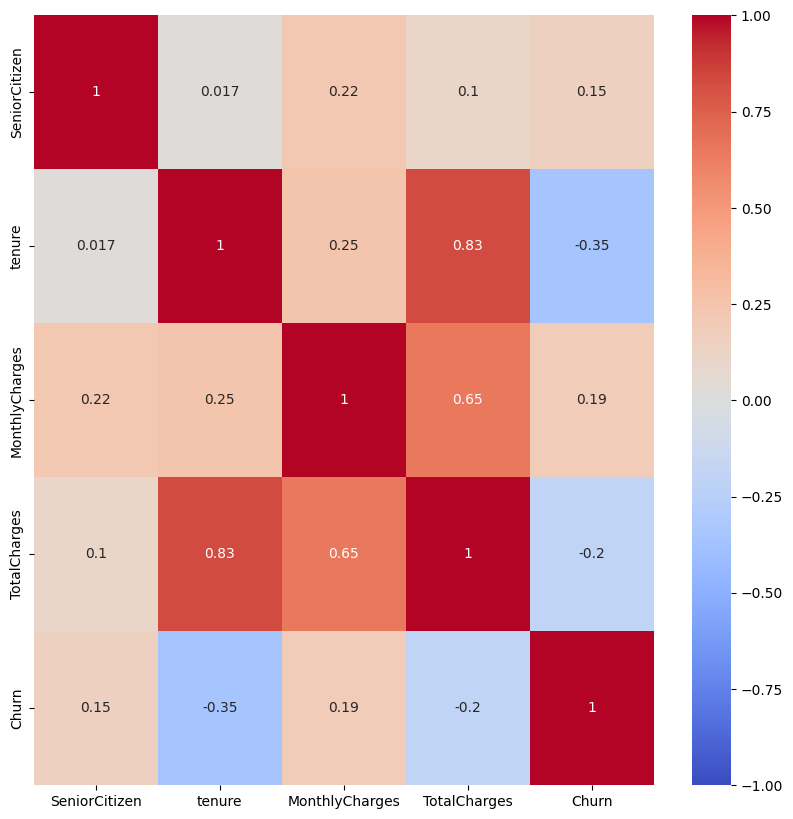

In [87]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_corr, annot=True, vmax=1, vmin=-1, cmap="coolwarm")
plt.xticks(rotation=0)

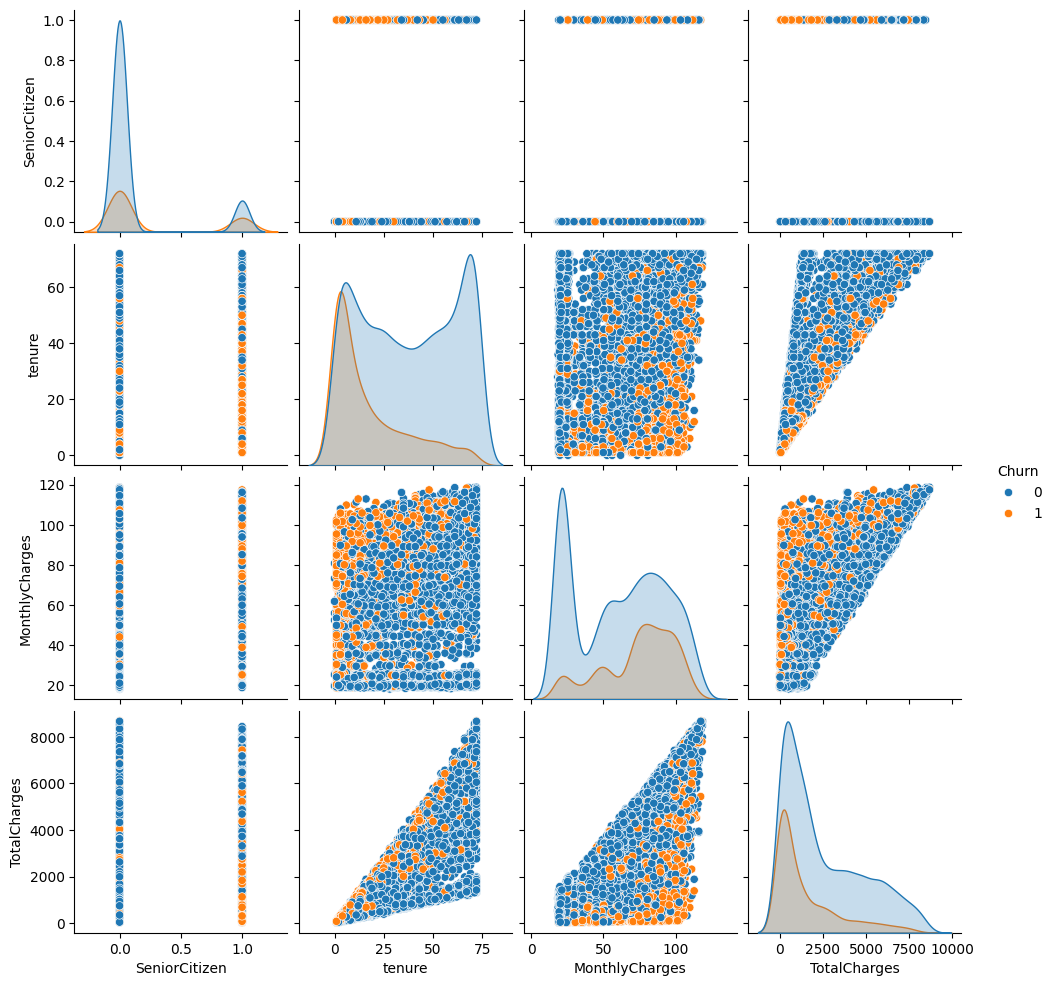

In [82]:
# seaborn 의 pairplot 으로 이탈여부(Churn)에 따라 시각화 해주세요.
# 단순히 사용한 pairplot으로 어떤 의미를 나타낼 수 있는지 잘 모르겠다..
# hue 옵션으로 준 column은 pairplot안의 색상으로만 나타낸다. (hue column과 다른 column의 plot을 나타내지 않음)
sns.pairplot(df, hue='Churn')

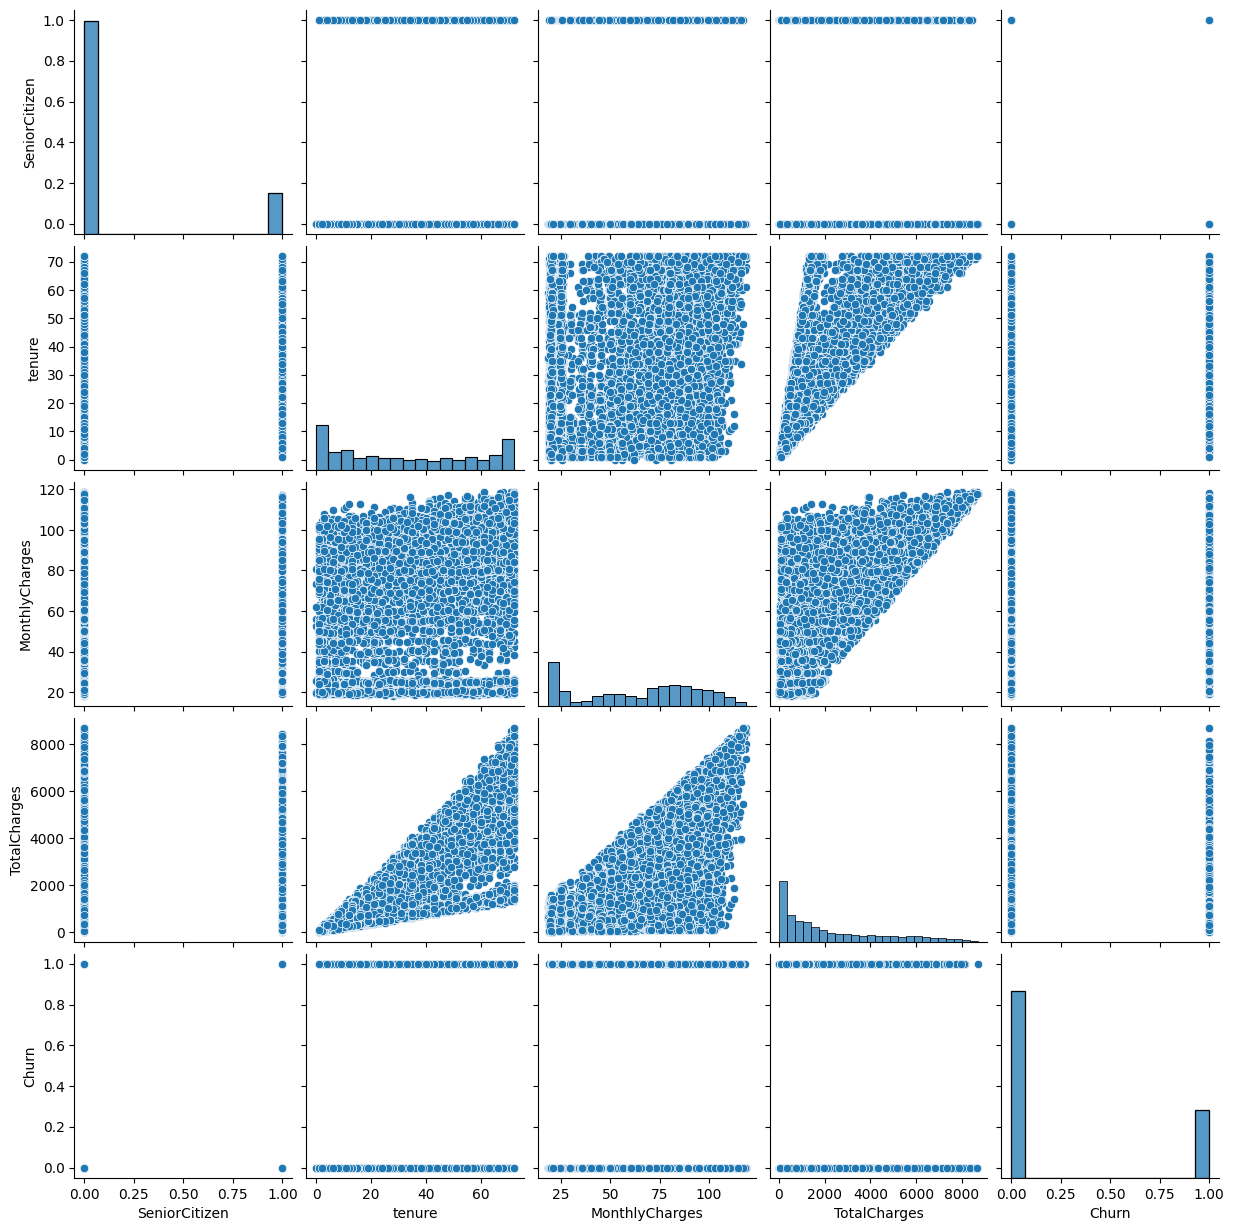

In [88]:
sns.pairplot(df)